## Monte Carlo method to compute moments
The Monte-Carlo method is applied to the computation of the first two moments of a random variable $Y=U^{-a}$, where $U\sim Unif([0,1])$ and $a\in(-1,1)$.
The mean is approximated using the sample mean and the variance by the sample variance. Confidence bounds of CLT and Chebyshev type are computed.

Let $X\sim U([0, 1])$ and generate $M$ independent draws $(X_{(j)}, j=1,\dots,,M)$ of $X$.

1. Calculate the sample mean $\bar{Y}_M$ and sample variance $\sigma_M$ for $(Y_{(i)}=f_1(X_{(i)}), i=1,\dots,M)$, set up a 95% confidence interval $[a_M,b_M]$ around $\bar{Y}_M$. 

2. Draw a graph containing $\bar{Y}_M,a_M,b_M,\sigma_M$ (on the vertical axis) against $M$ on the horizental axis with $M=10:10:10^5$. Comment on the convergence of $\sigma_M$ as $M$ gets larger.

In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [14]:
def cconv1d(M, a):
    flag = 2
    Np = 10
    delta = 0.05
    q = 1 / a

    # Mean
    exact = 1 / (1 - a)

    # Variance
    exact2 = 1 / (1 - 2 * a) - exact ** 2
    if exact2 < 0:
        print('Variance does not exist!!')

    Z = np.random.rand(M)
    X = 1 / Z ** a

    mean = np.cumsum(X) / np.arange(1, M+1)
    varest = np.cumsum((X - mean) ** 2) / np.arange(1, M+1)
    qmom = np.cumsum(np.abs(X - mean) ** q) / np.arange(1, M+1)
    err = np.abs(np.cumsum(X) / np.arange(1, M+1) - exact)

    if flag == 1:
        # Conf Inter. (CLT)
        am = mean - math.erfinv(1 - delta) * math.sqrt(2) * np.sqrt(varest / np.arange(1, M+1))
        bm = mean + math.erfinv(1 - delta) * math.sqrt(2) * np.sqrt(varest / np.arange(1, M+1))
    elif flag == 2:
        # Conf Inter. (Chebyshev)
        am = mean - delta ** (-0.5) * np.sqrt(varest / np.arange(1, M+1))
        bm = mean + delta ** (-0.5) * np.sqrt(varest / np.arange(1, M+1))
    elif flag == 3:
        # Conf Inter. (Chebyshev) qth moment
        am = mean - delta ** (-1 / q) * qmom ** (1 / q) / np.arange(1, M+1) ** (1 - 1 / q)
        bm = mean + delta ** (-1 / q) * qmom ** (1 / q) / np.arange(1, M+1) ** (1 - 1 / q)
    else:
        print('Something is wrong!!')
        return

    errp = err[np.arange(Np-1, M, Np)]  # plot only every Np-th point
    errvp = np.abs(varest[np.arange(Np-1, M, Np)] - exact2)
    varest = varest[np.arange(Np-1, M, Np)]
    amp = am[np.arange(Np-1, M, Np)]
    bmp = bm[np.arange(Np-1, M, Np)]
    meanp = mean[np.arange(Np-1, M, Np)]
    Mp = np.arange(Np, M+1, Np)

    M1 = Mp[0]
    M2 = Mp[-1]




       # Subplot 1
    plt.subplot(3, 1, 1)
    if len(errp) > 0:
        plt.loglog(Mp, errp, 'b', [M1, M2], [errp[-1]] * 2, 'r--', [M1, M2], errp[-1] * np.asarray([(M1/M2)**-0.5, 1]), 'g--')
        plt.legend(['|mean-mean_m|', 'constant', 'm^{-0.5}', 'm^{-1/3}'])
    else:
        plt.loglog(Mp, errp, 'b')
        plt.legend(['|mean-mean_m|'])
    plt.title('Convergence of empirical moments')
    plt.ylabel('Error')
    # Subplot 2
    plt.subplot(3, 1, 2)
    plt.plot(Mp, meanp, 'r', Mp, varest, 'g', Mp, amp, 'b', Mp, bmp, 'b')
    plt.legend(['Mean', 'Variance', 'Lower bound', 'Upper bound'])

    # Subplot 3
    # Subplot 3
    plt.subplot(3, 1, 3)
    if len(errvp) > 0:
        plt.loglog(Mp, errvp, 'b', [M1, M2], [errvp[-1]] * 2, 'r--', [M1, M2], errvp[-1] * np.array([(M1/M2)**-0.5, 1]), 'g--')
        plt.legend(['|var-var_m|', 'constant', 'm^{-0.5}', 'm^{-1/3}'])


    # Display the plots
    plt.show()


<ipython-input-14-f089cbe04c8e>:20: RuntimeWarning: divide by zero encountered in power
  qmom = np.cumsum(np.abs(X - mean) ** q) / np.arange(1, M+1)


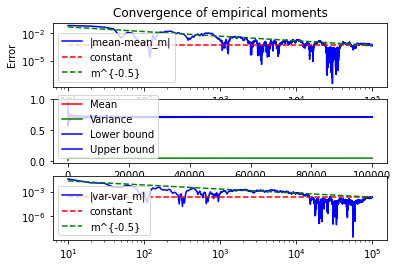

In [15]:
cconv1d(100000, -2/5)

C:\Users\Jehad\Desktop\Upwork task\milestone 2\series1\conflevel1.py:25: RuntimeWarning: divide by zero encountered in power
  qmom = np.cumsum(np.abs(X - mean) ** q) / np.arange(1, M+1)


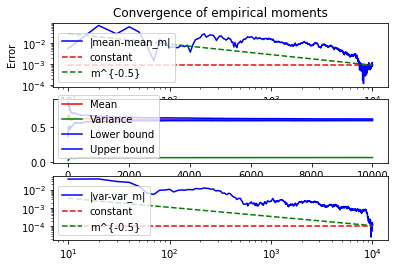

In [25]:
from conflevel1 import conflevel1
conflevel1(10000, -2/3)

In [28]:
from mcc1d import mcc1d
#from conflevel import conflevel

C:\Users\Jehad\Desktop\Upwork task\milestone 2\series1\conflevel.py:34: RuntimeWarning: divide by zero encountered in power
  


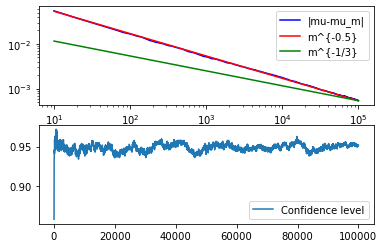

In [33]:
from conflevel import conflevel

Plot the results for the function $f_1(x)=x^{-\frac{2}{5}}$

<ipython-input-14-f089cbe04c8e>:20: RuntimeWarning: divide by zero encountered in power
  qmom = np.cumsum(np.abs(X - mean) ** q) / np.arange(1, M+1)


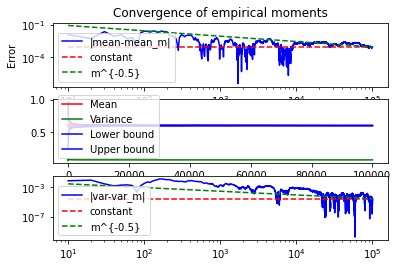

In [17]:

cconv1d(100000, -2/3)

Plot the results for the function $f_1(x)=x^{-\frac{2}{3}}$

The graph clearly exhibits the convergence of $\bar{Y}_M,a_M,b_M,\sigma_M$. However, as expected, the convergence of $\sigma_M$ is slower. Due to the highly oscillatory nature of the error, it is difficult make any definitive inference, but it clearly aligns with the line $CM^{\frac{1}{2}}$.